# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls

In [3]:
# Use this variable for testing only (replace "cities with cities2 in for loop")
# cities2 = ['dharan', 'ornskoldsvik', 'bucksport', 'lasa', 'barabai', 'vikhorevka', 'saint-gilles', 'barra do garcas', 'cermik', 'igbo ora', 'taolanaro', 'illoqqortoormiut', 'alotau', 'albany', 'sentyabrskiy', 'hamilton', 'port alfred', 'port hardy', 'hithadhoo', 'barrow','butaritari','faanui','hermanus','puerto ayora','jamestown', 'nefteyugansk']

In [4]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url. Test first by appending one city name to the end of f-string. Test get and json-ify.
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="

In [5]:
# Loop through each city in cities list (randomly put in list by starter code) and append to open lists. 
# Loop generates respons and json_ifies each response

name = []
city_id = []
lat = []
lon = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
date = []
country = []

counter = 0

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        print(f"{city} city number {counter} of {len(cities)} has been located.")
        counter += 1

    except (KeyError, IndexError):
        print(f"Missing data for city number {counter} of {len(cities)}.")
        counter += 1
    
    time.sleep(1)     

klaksvik city number 0 of 614 has been located.
kapaa city number 1 of 614 has been located.
hermanus city number 2 of 614 has been located.
ribeira grande city number 3 of 614 has been located.
Missing data for city number 4 of 614.
inta city number 5 of 614 has been located.
port alfred city number 6 of 614 has been located.
hilo city number 7 of 614 has been located.
vaini city number 8 of 614 has been located.
fairbanks city number 9 of 614 has been located.
naze city number 10 of 614 has been located.
lishu city number 11 of 614 has been located.
kodiak city number 12 of 614 has been located.
povenets city number 13 of 614 has been located.
arraial do cabo city number 14 of 614 has been located.
Missing data for city number 15 of 614.
general roca city number 16 of 614 has been located.
cape town city number 17 of 614 has been located.
borazjan city number 18 of 614 has been located.
ushuaia city number 19 of 614 has been located.
thompson city number 20 of 614 has been located.
b

bilma city number 167 of 614 has been located.
chabahar city number 168 of 614 has been located.
souillac city number 169 of 614 has been located.
ratnagiri city number 170 of 614 has been located.
lata city number 171 of 614 has been located.
samarai city number 172 of 614 has been located.
ancud city number 173 of 614 has been located.
port keats city number 174 of 614 has been located.
orocue city number 175 of 614 has been located.
Missing data for city number 176 of 614.
lasa city number 177 of 614 has been located.
srednekolymsk city number 178 of 614 has been located.
saskylakh city number 179 of 614 has been located.
juneau city number 180 of 614 has been located.
Missing data for city number 181 of 614.
pochutla city number 182 of 614 has been located.
saint-michel-des-saints city number 183 of 614 has been located.
butaritari city number 184 of 614 has been located.
nantucket city number 185 of 614 has been located.
chuy city number 186 of 614 has been located.
tiksi city num

clyde river city number 333 of 614 has been located.
vila velha city number 334 of 614 has been located.
polunochnoye city number 335 of 614 has been located.
coahuayana city number 336 of 614 has been located.
klyuchi city number 337 of 614 has been located.
mazamari city number 338 of 614 has been located.
saint-francois city number 339 of 614 has been located.
avera city number 340 of 614 has been located.
yar-sale city number 341 of 614 has been located.
airai city number 342 of 614 has been located.
maketu city number 343 of 614 has been located.
leningradskiy city number 344 of 614 has been located.
cam ranh city number 345 of 614 has been located.
zhezkazgan city number 346 of 614 has been located.
palana city number 347 of 614 has been located.
oussouye city number 348 of 614 has been located.
fort walton beach city number 349 of 614 has been located.
agadez city number 350 of 614 has been located.
sudak city number 351 of 614 has been located.
el tigre city number 352 of 614 h

Missing data for city number 499 of 614.
beringovskiy city number 500 of 614 has been located.
guarapari city number 501 of 614 has been located.
aasiaat city number 502 of 614 has been located.
rosario oeste city number 503 of 614 has been located.
misratah city number 504 of 614 has been located.
nchelenge city number 505 of 614 has been located.
mandalgovi city number 506 of 614 has been located.
ahipara city number 507 of 614 has been located.
olinda city number 508 of 614 has been located.
singaparna city number 509 of 614 has been located.
constitucion city number 510 of 614 has been located.
Missing data for city number 511 of 614.
kihei city number 512 of 614 has been located.
girona city number 513 of 614 has been located.
puerto penasco city number 514 of 614 has been located.
ginir city number 515 of 614 has been located.
jacareacanga city number 516 of 614 has been located.
nazarovo city number 517 of 614 has been located.
nerchinskiy zavod city number 518 of 614 has been l

In [6]:
# Convert Raw Data to DataFrame
city_data_df = pd.DataFrame({"City":name, "Country":country, "Latitude":lat, "Longitude":lon, "Max Temperature (F)":temperature, "Humidity (%)":humidity, "Cloud Cover (%)":cloudiness, "Wind Speed (mph)":windspeed, "Date":date})
city_data_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Klaksvík,FO,62.2266,-6.5890,44.60,100,90,12.66,1616351622
1,Kapaa,US,22.0752,-159.3190,71.60,68,20,20.71,1616351624
2,Hermanus,ZA,-34.4187,19.2345,63.00,77,3,4.00,1616351583
3,Ribeira Grande,PT,38.5167,-28.7000,60.80,82,75,13.80,1616351626
4,Inta,RU,66.0317,60.1659,10.78,93,82,7.05,1616351629


In [8]:
# Inspect the data and remove the cities where the humidity > 100%.
clean_city_data_df = city_data_df[city_data_df["Humidity (%)"] <= 100]
clean_city_data_df

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Klaksvík,FO,62.2266,-6.5890,44.60,100,90,12.66,1616351622
1,Kapaa,US,22.0752,-159.3190,71.60,68,20,20.71,1616351624
2,Hermanus,ZA,-34.4187,19.2345,63.00,77,3,4.00,1616351583
3,Ribeira Grande,PT,38.5167,-28.7000,60.80,82,75,13.80,1616351626
4,Inta,RU,66.0317,60.1659,10.78,93,82,7.05,1616351629
...,...,...,...,...,...,...,...,...,...
560,Burdeos,PH,14.8436,121.9697,77.20,89,0,7.72,1616352421
561,Mortka,RU,59.3322,66.0214,10.51,94,0,4.18,1616352422
562,Dawson,US,31.7735,-84.4466,66.20,48,75,11.50,1616352423
563,Neiafu,TO,-18.6500,-173.9833,77.00,88,75,6.91,1616352425


In [9]:
# Export the cleaned data dataframe to a csv for later use.
clean_city_data_df.to_csv("../Resources/city_data.csv", header=True)

## Latitude vs. Temperature Plot

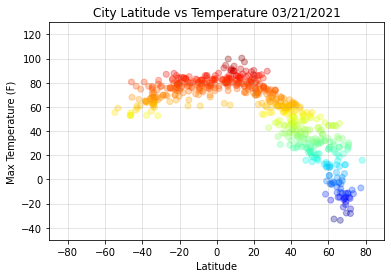

In [10]:
# To convert the access date: https://www.tutorialspoint.com/python/time_strftime.htm
# https://medium.com/better-programming/how-to-use-colormaps-with-matplotlib-to-create-colorful-plots-in-python-969b5a892f0c
# https://matplotlib.org/examples/color/colormaps_reference.html

plt.title(f'City Latitude vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-50, 130)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Max Temperature (F)"], alpha= 0.3, c = clean_city_data_df["Max Temperature (F)"], cmap = "jet", marker="o")

# Save the plot to png
#plt.savefig("../Images/LatTemp.png")

plt.show()

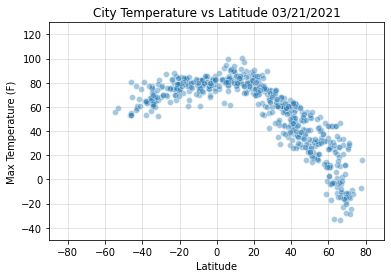

In [28]:
plt.title(f'City Temperature vs Latitude {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-50, 130)
# plt.figure(figsize=(6.5,6.5))

sns_scatter = sns.scatterplot(clean_city_data_df["Latitude"], clean_city_data_df["Max Temperature (F)"], alpha= 0.4)

# Save the plot to png
fig = sns_scatter.get_figure()
fig.savefig("../assets/img/LatTemp.png")
plt.show()

##  Latitude vs. Humidity Plot

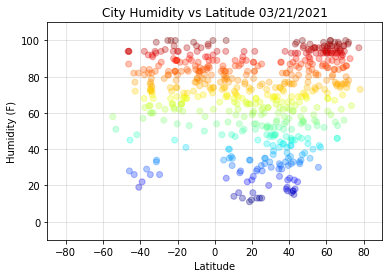

In [12]:
plt.title(f'City Humidity vs Latitude {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-10, 110)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity (%)"], alpha= 0.3, c = clean_city_data_df["Humidity (%)"], cmap = "jet", marker="o")

# Save the plot to png
#plt.savefig("../Images/LatHum.png")

plt.show()

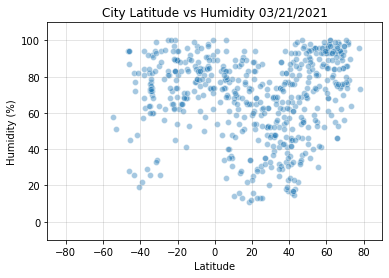

In [13]:
plt.title(f'City Latitude vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-10, 110)

sns_scatter = sns.scatterplot(clean_city_data_df["Latitude"], clean_city_data_df["Humidity (%)"], alpha= 0.4)

# Save the plot to png
fig = sns_scatter.get_figure()
fig.savefig("../assets/img/LatHum.png")
plt.show()

## Latitude vs. Cloudiness Plot

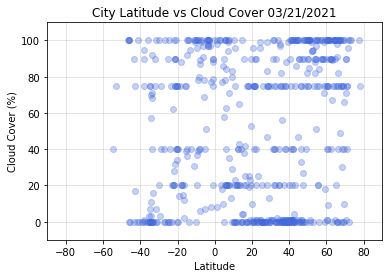

In [14]:
plt.title(f'City Latitude vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-10, 110)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloud Cover (%)"], color = "royalblue", alpha= 0.3, marker="o")

# Save the plot to png
#plt.savefig("../Images/LatCloud.png")

plt.show()

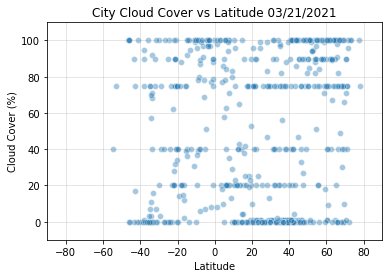

In [15]:
plt.title(f'City Cloud Cover vs Latitude {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-10, 110)

sns_scatter = sns.scatterplot(clean_city_data_df["Latitude"], clean_city_data_df["Cloud Cover (%)"], alpha= 0.4)

# Save the plot to png
fig = sns_scatter.get_figure()
fig.savefig("../assets/img/LatCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

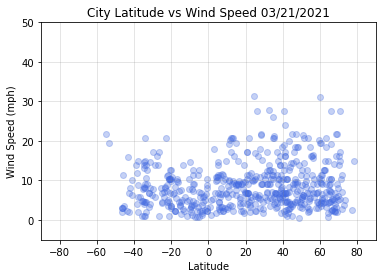

In [16]:
plt.title(f'City Latitude vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-5, 50)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed (mph)"], color = "royalblue", alpha= 0.3, marker="o")

# Save the plot to png
#plt.savefig("../Images/LatWind.png")

plt.show()

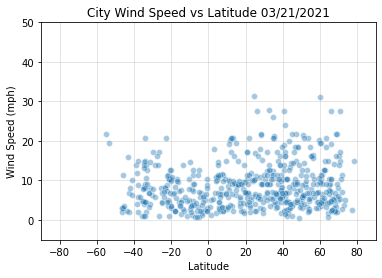

In [17]:
plt.title(f'City Wind Speed vs Latitude {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-5, 50)

sns_scatter = sns.scatterplot(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed (mph)"], alpha= 0.4)

# Save the plot to png
fig = sns_scatter.get_figure()
fig.savefig("../assets/img/LatWind.png")
plt.show()

## Linear Regression

In [18]:
# Find the cities in the northern hemisphere
north_cities = clean_city_data_df.loc[clean_city_data_df["Latitude"] > 0]
north_cities.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Klaksvík,FO,62.2266,-6.5890,44.60,100,90,12.66,1616351622
1,Kapaa,US,22.0752,-159.3190,71.60,68,20,20.71,1616351624
3,Ribeira Grande,PT,38.5167,-28.7000,60.80,82,75,13.80,1616351626
4,Inta,RU,66.0317,60.1659,10.78,93,82,7.05,1616351629
6,Hilo,US,19.7297,-155.0900,71.60,73,90,6.91,1616351351


In [19]:
# Find the cities in the southern hemisphere
south_cities = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0]
south_cities.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
2,Hermanus,ZA,-34.4187,19.2345,63.00,77,3,4.00,1616351583
5,Port Alfred,ZA,-33.5906,26.8910,65.43,70,92,10.71,1616351630
7,Vaini,TO,-21.2000,-175.2000,73.40,100,75,10.36,1616351633
13,Arraial do Cabo,BR,-22.9661,-42.0278,87.80,65,20,20.71,1616351640
14,General Roca,AR,-39.0333,-67.5833,80.60,22,0,13.80,1616351643


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

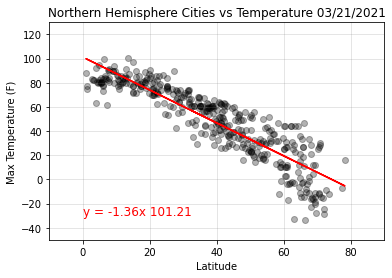

The r-squared value is 0.7995936909518784.


In [20]:
# Set the x and y limits for each graph to include min and max latitude because it is unknow what cities will be
# determined in the random sampling.
x_values = north_cities["Latitude"]
y_values = north_cities["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-50, 130)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,-30), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
#plt.savefig("../Images/NTemp.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r-squared value is {r2}.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

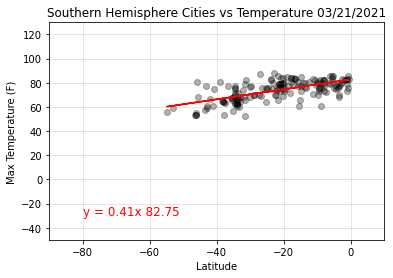

The r value is 0.6447005311967623.
The r-squared value is 0.4156387749253875.


In [21]:
x_values = south_cities["Latitude"]
y_values = south_cities["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-50, 130)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,-30), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
#plt.savefig("../Images/STemp.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

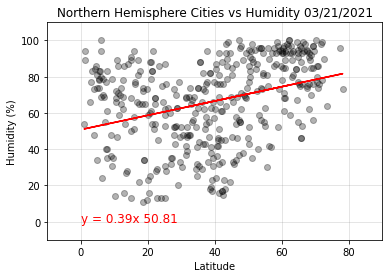

The r value is 0.33509823624242646.
The r-squared value is 0.11229082793278505.


In [22]:
x_values = north_cities["Latitude"]
y_values = north_cities["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,0), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
#plt.savefig("../Images/NHum.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

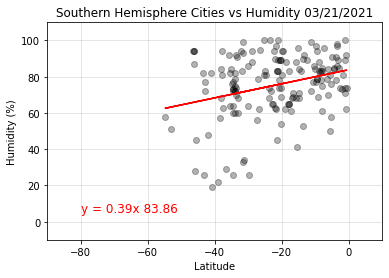

The r value is 0.29783331312788264.
The r-squared value is 0.08870468240873139.


In [23]:
x_values = south_cities["Latitude"]
y_values = south_cities["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,5), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
#plt.savefig("../Images/SHum.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

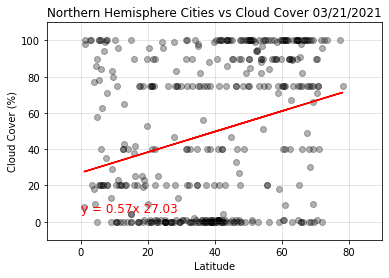

The r value is 0.2744349411094341.
The r-squared value is 0.07531453690173857.


In [24]:
x_values = north_cities["Latitude"]
y_values = north_cities["Cloud Cover (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,5), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
#plt.savefig("../Images/NCloud.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

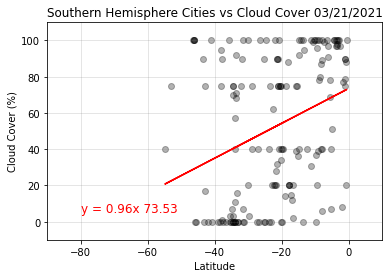

The r value is 0.32437620845024334.
The r-squared value is 0.10521992460855573.


In [25]:
x_values = south_cities["Latitude"]
y_values = south_cities["Cloud Cover (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,5), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
#plt.savefig("../Images/SCloud.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

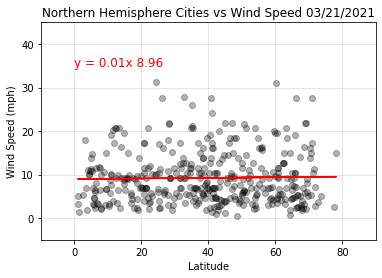

The r value is 0.023589199041718925.
The r-squared value is 0.0005564503114298331.


In [26]:
x_values = north_cities["Latitude"]
y_values = north_cities["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-5, 45)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,35), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
#plt.savefig("../Images/NWind.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

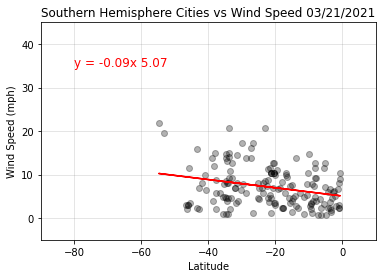

The r value is -0.27317120954140245.
The r-squared value is 0.07462250972231281.


In [27]:
x_values = south_cities["Latitude"]
y_values = south_cities["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-5, 45)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,35), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
#plt.savefig("../Images/SWind.png")
plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")